In [66]:
import pandas as  pd
import os
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import sklearn


## ***PARTIE 1*** ##

In [67]:
dfG = pd.read_csv("Data/GSM3533230_CGND-HRA-00013_counts.txt", sep="\t")
dfG.head()

,gene/TE,../../STAR_v252_mapping/CGND_12616/HRA-00013_PE.bam
0,A1BG,42
1,A1BG-AS1,149
2,A1CF,0
3,A2M,3327
4,A2M-AS1,101


In [68]:
path = "./Data" # the path of the data

pdList = [] # variable to temporary store all dataframes (one for each txt file)
# For all txt file
for fname in glob.glob(path+"/*.txt"):
    df = pd.read_table(fname) # put the file in a dataframe
    sample_name = re.search("GSM\d+", fname).group() # search the name of the sample in the file name
    df.rename(index= df["gene/TE"], inplace=True) # rename the index (=rows) using the column containing the gene name
    df.drop(columns=df.columns[0], axis=1, inplace=True) # drop the first column containing the gene name, no more need
    df.rename(columns={ df.columns[0]: sample_name }, inplace = True) # rename the column (there is only one column at this step) using the sample name
    pdList.append(df) # add the current dataframe in the list
data_matrix = pd.concat(pdList, 1) # concat all dataframe in 1 dataframe
data_matrix = data_matrix.transpose() # transpose the dataframe to get a more standard shape (samples x variables)

In [69]:
class MyDataFrame:
    
    def __init__(self, folder_path):
        self.__data_matrix = []
    
    def get_data_matrix(self):
        return self.__data_matrix
    
    def set_data_matrix(self,dataFrame):
        self.__data_matrix = dataFrame
        
    def get_describe(self):
        return self.__data_matrix.describe()


    def get_num_sample(self):
        return len(self.__data_matrix)

    def get_num_gene(self):
        return len(self.__data_matrix.columns)

    def get_sample_by_index(self, index):
        return self.__data_matrix.iloc[index]

    def get_gene_by_index(self, index):
        return self.__data_matrix.iloc[:, index]

   
    def get_median(self, is_sample=True):
        median = dict()
        if is_sample:
            for col in self.__data_matrix.columns:
                median[col] = self.__data_matrix.loc[:, col].median()
        else:
            for idx, row in self.__data_matrix.iterrows():
                median[idx] = row.median()
        return median


    
    def get_mean(self, is_sample=True):
        mean = dict()
        if is_sample:
            for col in self.__data_matrix.columns:
                mean[col] = self.__data_matrix.loc[:, col].mean()
        else:
            for idx, row in self.__data_matrix.iterrows():
                mean[idx] = row.mean()
        return mean

    
    def get_std(self, is_sample=True):
        std = dict()
        if is_sample:
            for col in self.__data_matrix.columns:
                std[col] = self.__data_matrix.loc[:, col].std()
        else:
            for idx, row in self.__data_matrix.iterrows():
                std[idx] = row.std()
        return std

   
    def get_min(self, is_sample=True):
        min = dict()
        if is_sample:
            for col in self.__data_matrix.columns:
                min[col] = self.__data_matrix.loc[:, col].min()
        else:
            for idx, row in self.__data_matrix.iterrows():
                min[idx] = row.min()
        return min

    
    def get_max(self, is_sample=True):
        max = dict()
        if is_sample:
            for col in self.__data_matrix.columns:
                max[col] = self.__data_matrix.loc[:, col].max()
        else:
            for idx, row in self.__data_matrix.iterrows():
                max[idx] = row.max()
        return max


        
    def plot_all_(self,is_sample = True):
        
        plt.figure(figsize=(12, 10))
        if is_sample:
            t = True
        else :
            t = False
        
        # Plot median
        gene1 = self.get_median(t)
        z1 = gene1.values()
        plt.subplot(3, 2, 1)
        plt.xlabel('Gene')
        plt.ylabel('Median')
        plt.title('Median expression level')
        plt.plot(z1, color='blue')
        
        # Plot mean
        gene2 = self.get_mean(t)
        z2 = gene2.values()
        plt.subplot(3, 2, 2)
        plt.xlabel('Gene')
        plt.ylabel('Mean')
        plt.title('Mean expression level ')
        plt.plot(z2, color='orange')
        
        # Plot standard deviation
        gene3 = self.get_std(t)
        z3 = gene3.values()
        plt.subplot(3, 2, 3)
        plt.xlabel('Gene')
        plt.ylabel('Std')
        plt.title('Standard deviation of expression level')
        plt.plot(z3, color='green')
        
        # Plot minimum
        gene4 = self.get_min(t)
        z4 = gene4.values()
        plt.subplot(3, 2, 4)
        plt.xlabel('Gene')
        plt.ylabel('Min')
        plt.title('Minimum expression level ')
        plt.plot(z4, color='red')
        
        # Plot maximum
        gene5 = self.get_max(t)
        z5 = gene5.values()
        plt.subplot(3, 2, 5)
        plt.xlabel('Gene')
        plt.ylabel('Max')
        plt.title('Maximum expression level ')
        plt.plot(z5, color='purple')

        plt.tight_layout()
        plt.show()

    
        
        
            
        
        
    



In [70]:
data1 = MyDataFrame("Data")
data1.get_data_matrix()
data1.set_data_matrix(data_matrix)
data1.get_data_matrix()



,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533382,42,189,0,4052,92,201,1,8,76,1,...,1023,2363,2137,1265,100,607,140,551,2269,2233
GSM3533252,37,110,0,4660,102,64,7,1,68,0,...,880,2077,1908,1072,119,478,129,525,1821,1921
GSM3533337,31,110,0,1484,84,60,1,1,12,0,...,656,1357,1345,749,61,341,102,346,1122,1437
GSM3533314,14,41,0,2185,105,198,4,0,24,0,...,958,2017,1817,1087,99,527,145,446,1522,1757
GSM3533391,37,118,0,1245,104,168,1,1,21,1,...,847,1822,1625,903,96,472,120,415,1556,1768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533291,29,142,0,1429,102,115,2,4,14,1,...,671,1526,1319,735,85,394,92,330,1279,1408
GSM3533349,31,142,0,1526,108,122,2,1,139,0,...,758,1724,1575,866,76,427,122,430,1478,1660
GSM3533339,39,95,0,1223,74,89,1,3,39,0,...,687,1424,1340,693,101,354,83,300,1145,1390
GSM3533399,46,179,0,2899,89,109,1,6,46,1,...,796,1694,1488,869,89,469,99,442,1684,1836


In [71]:
data1.get_data_matrix()


,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533382,42,189,0,4052,92,201,1,8,76,1,...,1023,2363,2137,1265,100,607,140,551,2269,2233
GSM3533252,37,110,0,4660,102,64,7,1,68,0,...,880,2077,1908,1072,119,478,129,525,1821,1921
GSM3533337,31,110,0,1484,84,60,1,1,12,0,...,656,1357,1345,749,61,341,102,346,1122,1437
GSM3533314,14,41,0,2185,105,198,4,0,24,0,...,958,2017,1817,1087,99,527,145,446,1522,1757
GSM3533391,37,118,0,1245,104,168,1,1,21,1,...,847,1822,1625,903,96,472,120,415,1556,1768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533291,29,142,0,1429,102,115,2,4,14,1,...,671,1526,1319,735,85,394,92,330,1279,1408
GSM3533349,31,142,0,1526,108,122,2,1,139,0,...,758,1724,1575,866,76,427,122,430,1478,1660
GSM3533339,39,95,0,1223,74,89,1,3,39,0,...,687,1424,1340,693,101,354,83,300,1145,1390
GSM3533399,46,179,0,2899,89,109,1,6,46,1,...,796,1694,1488,869,89,469,99,442,1684,1836


In [72]:
data1.get_num_gene()

28953

In [73]:
data1.get_num_sample()

176

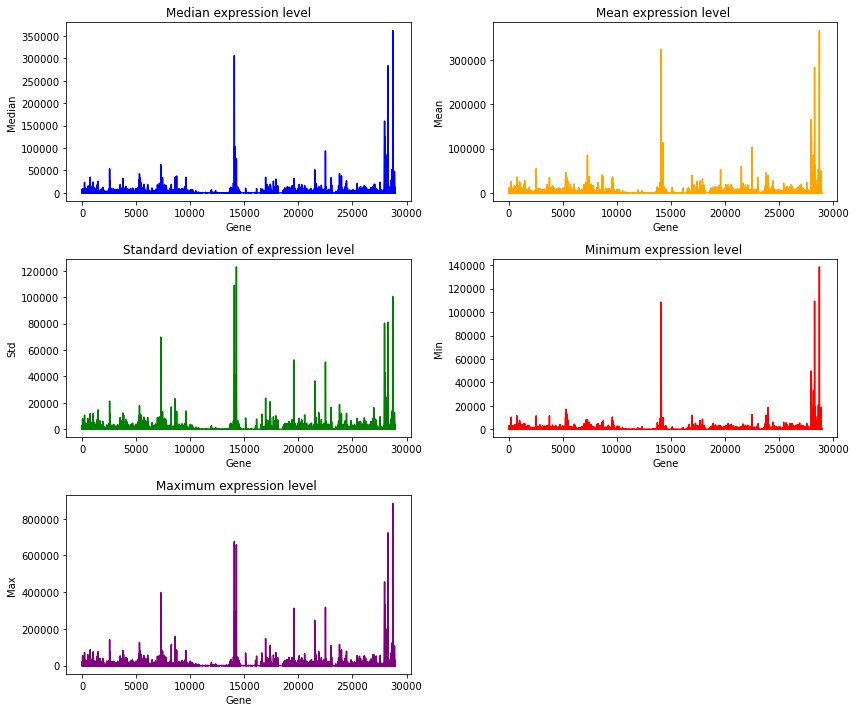

In [74]:
data1.plot_all_()

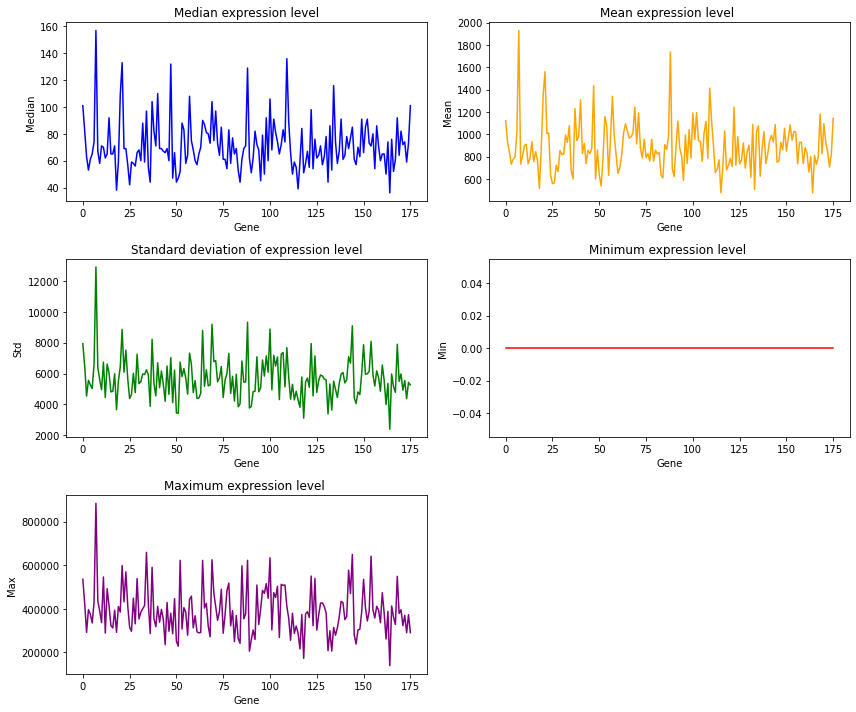

In [75]:
data1.plot_all_(False)

In [76]:
# LECTURE FICHIER XML
url = '{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}'
tree = ET.parse('Data/GSE124439_family.xml')
root = tree.getroot()
#samples = root.findall(url+"Sample")
#print(samples)

data_list = []

# Loop to loop through samples and extract other annotations
for sample in root.findall(url+'Sample'): 
    #Sample ID retrieval
    #print(sample)
    sample_id = sample.get('iid')
    
    # Recovery of annotations
    annotations = {}
    for i in sample.findall(url+'Channel'):
        #print(i)
        for charac in i.findall(url+'Characteristics'):
            if charac.get('tag') in ['cns subregion', 'subject id', 'sample group']:
                annotations[charac.get('tag')] = charac.text.strip()    
    # Add data to list
    data = {'sample_id': sample_id, **annotations}
    data_list.append(data)
#print(ET.tostring(root, encoding='unicode'))    
# Creating the DataFrame from the data

df = pd.DataFrame(data_list)  
df

,sample_id,cns subregion,subject id,sample group
0,GSM3533230,Frontal Cortex,NEUEL133AK6,ALS Spectrum MND
1,GSM3533231,Frontal Cortex,NEUYV496XLP,ALS Spectrum MND
2,GSM3533232,Frontal Cortex,NEUZU200WEQ,ALS Spectrum MND
3,GSM3533233,Frontal Cortex,NEUME287RK2,ALS Spectrum MND
4,GSM3533234,Frontal Cortex,NEUEC006FND,ALS Spectrum MND
...,...,...,...,...
171,GSM3533401,Frontal Cortex,NEUMY028JH4,ALS Spectrum MND
172,GSM3533402,Frontal Cortex,NEUXR145UBL,ALS Spectrum MND
173,GSM3533403,Frontal Cortex,NEUKN209FNW,ALS Spectrum MND
174,GSM3533404,Frontal Cortex,NEUUF289NRL,ALS Spectrum MND


In [121]:
class MyDataFrame2:
    
    def __init__(self, folder_path):
        self.__data_matrix = []
    
    def get_data_matrix(self):
        return self.__data_matrix
    
    def set_data_matrix(self,dataFrame):
        self.__data_matrix = dataFrame
    
    def is_positive(self,index):
        if "ALS" in self.get_data_matrix().loc[index, "sample group"]:
            return 1
        else:
            return 0

    def is_positive2(self,index):
        if "sALS" in self.get_data_matrix().loc[index, "diagnosis"]:
            return 1
        else:
            return 0
        
    def represent_both(self):
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
        
        # Plot the first figure on the left side
        counts = self.__data_matrix['sample group'].value_counts(normalize=True)*100
        axes[0].pie(counts.values, labels = counts.index, autopct='%1.1f%%',colors=['red','blue','green'])
        axes[0].set_title('Repartition des sujets par categorie')
        
        # Plot the second figure on the right side
        counts = self.__data_matrix['cns subregion'].value_counts(normalize=True)*100
        axes[1].pie(counts.values, labels= counts.index, autopct='%1.1f%%', colors=['red','blue','green','pink'])
        axes[1].set_title('Repartition des sujets par categorie')
        fig.subplots_adjust(wspace=1)
        plt.show()


        
        

In [78]:
data2 = MyDataFrame2("Data1")
data2.get_data_matrix()
data2.set_data_matrix(df)
data2.get_data_matrix()

,sample_id,cns subregion,subject id,sample group
0,GSM3533230,Frontal Cortex,NEUEL133AK6,ALS Spectrum MND
1,GSM3533231,Frontal Cortex,NEUYV496XLP,ALS Spectrum MND
2,GSM3533232,Frontal Cortex,NEUZU200WEQ,ALS Spectrum MND
3,GSM3533233,Frontal Cortex,NEUME287RK2,ALS Spectrum MND
4,GSM3533234,Frontal Cortex,NEUEC006FND,ALS Spectrum MND
...,...,...,...,...
171,GSM3533401,Frontal Cortex,NEUMY028JH4,ALS Spectrum MND
172,GSM3533402,Frontal Cortex,NEUXR145UBL,ALS Spectrum MND
173,GSM3533403,Frontal Cortex,NEUKN209FNW,ALS Spectrum MND
174,GSM3533404,Frontal Cortex,NEUUF289NRL,ALS Spectrum MND


In [79]:
data2.is_positive(150)

0

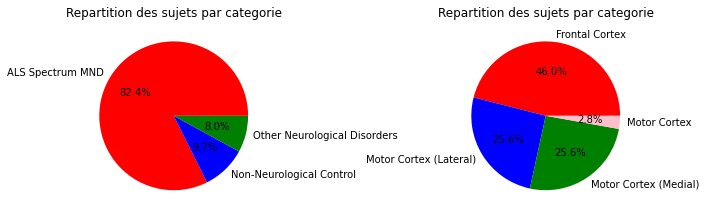

In [80]:
data2.represent_both()

In [81]:
# on crée une instance de l'objet StandardScaler pour centrer et réduire les données
scaler = StandardScaler()
# on transforme les données originales en données centrées et réduites
X_scaled = scaler.fit_transform(data1.get_data_matrix())

# on crée une instance de l'objet PCA en spécifiant le nombre de composantes principales souhaité
pca = PCA(n_components=176)
# on applique l'analyse en composantes principales aux données centrées et réduites
X_pca = pca.fit_transform(X_scaled)



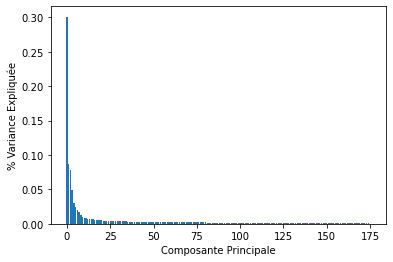

In [82]:
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel('Composante Principale')
plt.ylabel('% Variance Expliquée')
plt.show()



In [83]:

# on crée une instance de l'objet StandardScaler pour centrer et réduire les données
scaler = StandardScaler()
# on transforme les données originales en données centrées et réduites
X_scaled = scaler.fit_transform(data1.get_data_matrix())
pca = PCA(n_components=51)
# on applique l'analyse en composantes principales aux données centrées et réduites
X_pca = pca.fit_transform(X_scaled)

variance_cumulee = sum(pca.explained_variance_ratio_)*100
print(variance_cumulee)

79.99263462461792


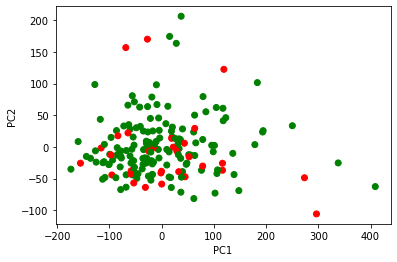

In [84]:
pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]

# appliquer la fonction is_positive() à chaque point et définir la couleur correspondante
colors = np.array(['red', 'green'])
y = np.array([data2.is_positive(i) for i in np.arange(len(pc1))])
colors = colors[y]

# tracer le graphique en deux dimensions avec les coordonnées des échantillons dans les deux  premiers PC
fig, ax = plt.subplots()
ax.scatter(pc1, pc2, c=colors)



ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()


In [85]:
#####test################
for i in range (len(pc1)):
    if y[i]!=data2.is_positive(i):
        print("!!!!!!!!")

Partie 5

In [86]:
als_index = data2.get_data_matrix()['sample group'] == "ALS Spectrum MND" # with data_annotation the dataframe containing the annotation
ctrl_index = data2.get_data_matrix()['sample group'] == "Non-Neurological Control"

In [87]:
pvalues = data_matrix.apply(lambda x: ttest_ind(x[als_index.values], x[ctrl_index.values]).pvalue)

In [88]:
pvalues

A1BG                      0.291018
A1BG-AS1                  0.426198
A1CF                      0.180929
A2M                       0.231381
A2M-AS1                   0.906208
                            ...   
X8_LINE:CR1:LINE          0.797876
X9_LINE:L1:LINE           0.975164
Zaphod2:hAT-Tip100:DNA    0.949136
Zaphod3:hAT-Tip100:DNA    0.713074
Zaphod:hAT-Tip100:DNA     0.710740
Length: 28953, dtype: float64

In [89]:
# Définir les axes x et y
x = data1.get_data_matrix().apply(lambda x:np.log2(x[als_index.values].mean()/x[ctrl_index.values].mean()))
y = -1 * np.log10(pvalues)

# Définir la couleur et la taille des points
color = np.where(pvalues<0.05, 'red', 'gray')

# Tracer le graphique
plt.scatter(x, y, c=color)

# Personnaliser le graphique
plt.xlabel('log2FoldChange')
plt.ylabel('-log10(pvalue)')
plt.title('Volcano Plot')
plt.legend(['Significant', 'Non-Significant'])

# Afficher le graphique
plt.show()

ZeroDivisionError: float division by zero

Partie 6

In [90]:
x = scaler.fit_transform(data1.get_data_matrix())
y = [0] * 176
print(len(y))

176


In [91]:
for i in range(len(y)):
    if data2.is_positive(i):
      y[i] = 1
print(y)
print(len(y))


[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
176


In [92]:
x = scaler.fit_transform(data1.get_data_matrix())
y = [0] * 176
print(len(y))

176


In [93]:
for i in range(len(y)):
    if data2.is_positive(i):
      y[i] = 1
print(y)
print(len(y))


[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
176


In [94]:
elasticNet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=0.5).fit(x, y)

/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [95]:
elasticNet = LogisticRegressionCV(penalty='elasticnet', cv= 3, solver='saga', l1_ratios=[0.25,0.5,0.75], Cs=[0.1,0.5], scoring= 'accuracy').fit(x, y)
#tres long a se lancer et j'ai pas capter

/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassi

In [96]:
model_prediction = elasticNet.predict(x)
accuracy_train_dataset = sklearn.metrics.accuracy_score(y, model_prediction)

In [97]:
path = "./Data_test" # the path of the data

pdList = [] # variable to temporary store all dataframes (one for each txt file)
# For all txt file
for fname in glob.glob(path+"/*.txt"):
    df = pd.read_table(fname) # put the file in a dataframe
    sample_name = re.search("GSM\d+", fname).group() # search the name of the sample in the file name
    df.rename(index= df["gene/TE"], inplace=True) # rename the index (=rows) using the column containing the gene name
    df.drop(columns=df.columns[0], axis=1, inplace=True) # drop the first column containing the gene name, no more need
    df.rename(columns={ df.columns[0]: sample_name }, inplace = True) # rename the column (there is only one column at this step) using the sample name
    pdList.append(df) # add the current dataframe in the list
datatest_matrix = pd.concat(pdList, 1) # concat all dataframe in 1 dataframe
datatest_matrix = datatest_matrix.transpose() # transpose the dataframe to get a more standard shape (samples x variables)

In [98]:
datatest = MyDataFrame("Data_set")
datatest.set_data_matrix(datatest_matrix)
datatest.get_data_matrix().head()


,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3477246,28,76,0,3462,98,141,4,2,15,1,...,508,1118,992,520,42,276,50,294,1290,1593
GSM3477226,60,209,0,6811,136,250,1,1,54,1,...,708,1697,1461,893,53,458,156,461,1773,1938
GSM3477224,82,277,0,7690,187,209,4,6,65,1,...,696,1633,1520,956,70,480,100,491,2079,2170
GSM3477244,96,224,3,8890,166,269,5,0,47,1,...,973,2533,2328,1350,84,682,175,691,2609,3090
GSM3477220,44,149,1,5266,125,186,2,0,138,2,...,690,1708,1492,864,68,394,83,354,1685,2210


In [99]:
x_test = scaler.fit_transform(datatest.get_data_matrix())

In [127]:
# LECTURE FICHIER XML
url = '{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}'
tree = ET.parse('Data_test/GSE122649_family.xml')
root = tree.getroot()
#samples = root.findall(url+"Sample")
#print(samples)

data_list = []

# Loop to loop through samples and extract other annotations
for sample in root.findall(url+'Sample'): 
    #Sample ID retrieval
    #print(sample)
    sample_id = sample.get('iid')
    
    # Recovery of annotations
    annotations = {}
    for i in sample.findall(url+'Channel'):
        #print(i)
        for charac in i.findall(url+'Characteristics'):
            if charac.get('tag') in ['tissue', 'subject id', 'diagnosis']:
                annotations[charac.get('tag')] = charac.text.strip()    
    # Add data to list
    data = {'sample_id': sample_id, **annotations}
    data_list.append(data)
#print(ET.tostring(root, encoding='unicode'))    
# Creating the DataFrame from the data

df1 = pd.DataFrame(data_list)  

In [148]:
datatest2 = MyDataFrame2("Data_test")
datatest2.get_data_matrix()
datatest2.set_data_matrix(df1)
datatest2.get_data_matrix()

,sample_id,tissue,subject id,diagnosis
0,GSM3477217,motor cortex,JR9,sALS
1,GSM3477218,motor cortex,JR9,sALS
2,GSM3477219,motor cortex,JR48,sALS
3,GSM3477220,motor cortex,JR48,sALS
4,GSM3477221,motor cortex,JR29,sALS
5,GSM3477222,motor cortex,JR29,sALS
6,GSM3477223,motor cortex,JR30,sALS/FTD
7,GSM3477224,motor cortex,JR30,sALS/FTD
8,GSM3477225,motor cortex,JR33,sALS
9,GSM3477226,motor cortex,JR33,sALS


In [129]:
x.shape

(176, 28953)

In [130]:
x_test.shape

(38, 28952)

In [131]:
diff1 = datatest.get_data_matrix().columns.difference(data1.get_data_matrix().columns)

In [132]:
diff1

Index(['C11orf84', 'C17orf105', 'C6orf183', 'EIF2S3L', 'EP400NL', 'FAM231AP',
       'FAM231BP', 'FBXO22-AS1', 'GMCL1P1', 'GRASPOS', 'GSTTP1', 'KIAA1456',
       'LINC02581', 'LOC100131303', 'LOC100271832', 'LOC100288842',
       'LOC100505817', 'POP3', 'PP14571', 'RFWD2', 'RTFDC1', 'T', 'TMEM27',
       'TMEM5', 'WDR98', 'XAGE1E'],
      dtype='object')

In [133]:
diff2 = data1.get_data_matrix().columns.difference(datatest.get_data_matrix().columns)

In [134]:
diff2

Index(['B3GNT10', 'C17orf113', 'CFAP97D1', 'CLTRN', 'COP1', 'DPEP2NB',
       'EIF2S3B', 'EP400P1', 'ETDC', 'FAM90A26', 'GRASP-AS1', 'GSTT4', 'KLF18',
       'LINC02582', 'LOC100130449', 'OR14K1', 'PYDC5', 'RMC1', 'RNF227',
       'RTF2', 'RXYLT1', 'SPINDOC', 'TBXT', 'TRMT9B', 'TUBB8P12', 'XAGE1A',
       'ZSCAN5C'],
      dtype='object')

In [135]:
d1 = data1.get_data_matrix().drop(diff2, axis=1)
dt = datatest.get_data_matrix().drop(diff1, axis=1)

In [136]:
X_train = scaler.fit_transform(d1)
X_test = scaler.fit_transform(dt)

In [137]:
X_train.shape

(176, 28926)

In [138]:
X_test.shape

(38, 28926)

In [139]:
y_train = y

In [113]:
elasticNet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=0.5).fit(X_train, y_train)

/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [140]:
model_prediction = elasticNet.predict(X_train)
accuracy_train_dataset = sklearn.metrics.accuracy_score(y_train, model_prediction)

In [141]:
model_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [142]:
accuracy_train_dataset

1.0

In [143]:
prediction_test = elasticNet.predict(X_test)

In [144]:
prediction_test

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0])

In [145]:
y_test = [0] * 38
print(len(y_test))

38


In [150]:
for i in range(len(y_test)):
    if datatest2.is_positive2(i):
      y_test[i] = 1
print(y_test)
print(len(y_test))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
38


In [151]:
accuracy_test_dataset = sklearn.metrics.accuracy_score(y_test, prediction_test)

In [154]:
print("Model Precision : {:.3f}%".format(accuracy_test_dataset * 100))

Model Precision : 55.263%
